In [1]:
%matplotlib inline

In [2]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A



In [6]:
image = cv2.imread('data/images/training/6Z2_4584.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [22]:
f = open('data/labels/training/6Z2_4584.txt')
f.read()

'0 0.416911 0.749592 0.039321 0.082283\n0 0.546429 0.674117 0.031027 0.082500\n'

In [51]:
box = [[0.416911, 0.749592, 0.039321, 0.082283,'0'],[0.546429, 0.674117, 0.031027, 0.082500,'0']]

In [57]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo'))

In [58]:
transformed = transform(image=image, bboxes=box,label_fields = ['0'])

In [59]:
transformed_image = transformed['image']

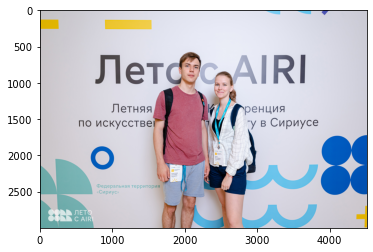

In [60]:
plt.imshow(image)

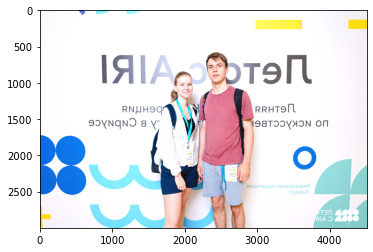

In [61]:
plt.imshow(transformed_image)

In [64]:
plt.savefig('6Z2_4584.jpg') 

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

In [62]:
transformed_bboxes = transformed['bboxes']

In [63]:
transformed_bboxes

[(0.5830890000000001, 0.749592, 0.03932099999999994, 0.082283, '0'),
 (0.4535709999999999,
  0.674117,
  0.031027000000000027,
  0.08250000000000002,
  '0')]

In [65]:
transformed_image

array([[[246, 246, 255],
        [247, 247, 255],
        [247, 247, 255],
        ...,
        [238, 235, 239],
        [239, 237, 240],
        [237, 237, 239]],

       [[246, 246, 255],
        [248, 248, 255],
        [248, 248, 255],
        ...,
        [241, 239, 242],
        [241, 239, 242],
        [240, 240, 242]],

       [[244, 244, 255],
        [245, 245, 255],
        [248, 248, 255],
        ...,
        [241, 239, 242],
        [239, 237, 240],
        [240, 240, 242]],

       ...,

       [[241, 242, 237],
        [240, 240, 238],
        [242, 242, 240],
        ...,
        [136, 206, 201],
        [136, 206, 201],
        [135, 205, 200]],

       [[241, 242, 235],
        [240, 241, 234],
        [240, 241, 235],
        ...,
        [131, 201, 198],
        [128, 200, 194],
        [132, 204, 198]],

       [[241, 242, 235],
        [242, 244, 237],
        [244, 245, 239],
        ...,
        [135, 206, 203],
        [136, 208, 202],
        [136, 208, 202]]

In [66]:
cv2.imwrite('6Z2_4584.jpg', transformed_image)

True

In [68]:
f = open('data/obj/6Z2_4584.txt')
f.read()

'0 0.416911 0.749592 0.039321 0.082283\n0 0.546429 0.674117 0.031027 0.082500\n'

In [73]:
f.read()

''

In [77]:
f = open('data/obj/6Z2_4584.txt')
bbox = []
for line in f:
    print(line)
    box = []
    staff = line.split()
    for i in range(1,5):
        box.append(float(staff[i]))
    bbox.append(box)

0 0.416911 0.749592 0.039321 0.082283

0 0.546429 0.674117 0.031027 0.082500



In [78]:
bbox

[[0.416911, 0.749592, 0.039321, 0.082283],
 [0.546429, 0.674117, 0.031027, 0.0825]]

In [79]:
pwd

'/home/sirius/Tracking'

In [81]:
ls

 6Z2_4584.jpg      badges/        draw-YOLO-box/   yolov5/
 annotations.xml   data/          test.ipynb       yolov5s.pt
 Aug.ipynb         dataset.yaml   wandb/          'Без названия.ipynb'


In [ ]:

image = cv2.imread('data/images/training/6Z2_4584.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

NameError: name 'os' is not defined

In [83]:
import os

In [88]:
file_list = os.listdir('data/obj')

In [91]:
file_list[1][-1]

't'

In [96]:
mimage = []
bbox = []
for x in file_list:
    if x[-1] == 'g':
        image = cv2.imread('data/obj/'+x)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mimage.append(image)
    if x[-1] == 't':
        f = open('data/obj/'+x)
        for line in f:
            box = []
            staff = line.split()
            for i in range(1,5):
                box.append(float(staff[i]))
            bbox.append(box)

In [105]:
for a in bbox:
    a.append('0')

In [107]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5)
], bbox_params=A.BboxParams(format='yolo'))

In [111]:
import numpy as np

In [113]:
mimage = np.array(mimage)

In [115]:
bbox

array([['0.545233', '0.821272', '0.061896', '0.129857', '0'],
       ['0.533547', '0.088542', '0.04475', '0.083542', '0'],
       ['0.338468', '0.636817', '0.062741', '0.112967', '0'],
       ...,
       ['0.438623', '0.629933', '0.038789', '0.086467', '0'],
       ['0.562231', '0.718815', '0.047017', '0.097497', '0'],
       ['0.43882', '0.650468', '0.042076', '0.092803', '0']], dtype='<U32')

In [114]:
transformed = transform(image=mimage, bboxes=bbox,label_fields = ['0'])

ValueError: not enough values to unpack (expected 2, got 1)